In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm
import scipy

##### Link to the data: https://github.com/owid/energy-data/blob/master/owid-energy-data.csv
Also you can find a lot of interesting data here https://ourworldindata.org

In [2]:
df = pd.read_csv('owid-energy-data.csv')

In [3]:
df['percent_of_fossil'] = df['fossil_fuel_consumption']/df['primary_energy_consumption']
df.replace(to_replace=df['percent_of_fossil'].loc[df['percent_of_fossil']>1].values, value=1, inplace=True)
df['percent_of_renewable'] = df['renewables_consumption']/df['primary_energy_consumption']
df['percent_of_nuclear'] = df['nuclear_consumption']/df['primary_energy_consumption']
All_from1965 = df[['year', 'country', 'primary_energy_consumption', 'fossil_fuel_consumption', 
                   'renewables_consumption', 'population', 'percent_of_fossil','percent_of_renewable', 
                   'nuclear_consumption', 'percent_of_nuclear']]

From all data I selected two lists "Europe"  and "Others". These lists contain the most complete information (almost without NaN values).
I did this to get rid of the offsets in data.

In [4]:
Europe_list = ['Austria', 'Belgium', 'Bulgaria', 'Cyprus', 'Czechia', 'Denmark', 'Finland', 'France', 'Germany', 
'Greece', 'Hungary', 'Iceland', 'Italy', 'Luxembourg', 'Netherlands', 'New Zealand', 'Norway',
'Poland', 'Portugal', 'Romania', 'Slovakia', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom']#, 'Croatia', 'Slovenia'
len(Europe_list)

25

In [5]:
Others_list = ['Hong Kong', 'China', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Japan', 'Malaysia', 'Mexico', 'Morocco', 'Oman', 'Pakistan',
          'Philippines', 'Qatar', 'Singapore', 'Saudi Arabia', 'South Korea', 'Sri Lanka', 'Taiwan', 'Thailand', 'Trinidad and Tobago', 
          'Turkey', 'United Arab Emirates', 'United States', 'Venezuela', 'Vietnam']
len(Others_list)

28

In [6]:
All_list = Europe_list + Others_list

In [7]:
Others_data = All_from1965.loc[(All_from1965['country'].isin(Others_list)) & (All_from1965['year'] >= 1965) & (All_from1965['year'] < 2021)]

In [8]:
Europe_data = All_from1965.loc[(All_from1965['country'].isin(Europe_list)) & (All_from1965['year'] >= 1965)]

In [9]:
Total_data = All_from1965.loc[(All_from1965['country'].isin(All_list)) & (All_from1965['year'] >= 1965) & (All_from1965['year'] < 2021)]

In [10]:
World_data = df.loc[(df['country'] == 'World') & (df['year'] >= 1965)] 
#World_data.head()

### All starts from this graph
I saw this graph in YouTube video. (Link: https://youtu.be/B7jTIeBSes8, time: 6:25)\
The author said that the graph is a straight line.
And then, author concluded, that countries cannot influence these values significantly with their ecological programs.
I found data from that video and did a little review on them.

Firstly i repeated that graph.

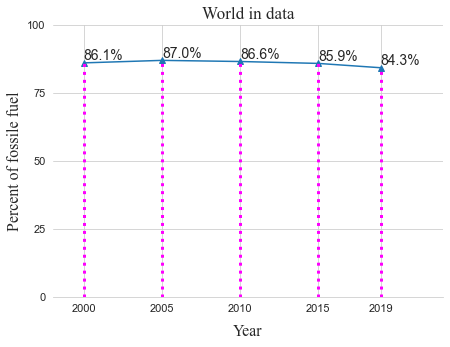

In [11]:
sns.set_style("whitegrid")
fig, ax = plt. subplots()
fig.set_size_inches(7,5)

right_side, left_side, top_side  = ax.spines["right"], ax.spines["left"], ax.spines["top"]
right_side.set_visible(False), left_side.set_visible(False), top_side.set_visible(False)

ax.set(xlim=(1998, 2023))
plt.xlabel("Year", fontdict = {"fontname" : "Times New Roman", "fontsize" : 16}, labelpad = 10)
plt.ylabel("Percent of fossile fuel", fontdict = {"fontname" : "Times New Roman", "fontsize" : 16})
plt.title("World in data", {"fontname" : "Times New Roman", "fontsize" : 17})

plt.plot([2000, 2005, 2010, 2015, 2019], World_data.loc[World_data['year'].isin([2000, 2005, 2010, 2015, 2019]), 'percent_of_fossil']*100, marker = "^", animated = True)
plt.yticks(np.arange(0, 105, 25), fontsize = 11)
plt.xticks([2000, 2005, 2010, 2015, 2019], fontsize = 11, rotation = 0)

for key, value in dict(zip([2000, 2005, 2010, 2015, 2019],(World_data.loc[World_data['year'].isin([2000, 2005, 2010, 2015, 2019]), 'percent_of_fossil'])*100)).items():
    plt.axvline(x = key, c = 'magenta', ls = ':', lw = 3, ymax = value/100)
    plt.text(key, value, str('{:.1f}'.format(value) + '%'), fontdict = {"fontsize" : 14}, va = 'bottom');

#plt.tight_layout(h_pad = 10)


### The same data, the same numbers, but another visualization!
And then, i built graph based on the same data, but changed visualization part.
It doesn't really look like a straight line. I only changed the scope along Y axis and remove the values from it.

In [12]:
#World_data

<Figure size 1200x1000 with 0 Axes>

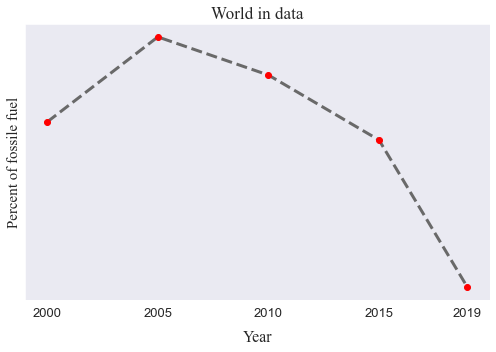

In [13]:
sns.set_style("dark")
plt.figure(figsize = (12,10), dpi = 100)
plt.gcf().subplots_adjust(bottom=0.2)
fig, ax = plt.subplots()
fig.set_size_inches(7,5)

right_side, top_side  = ax.spines["right"], ax.spines["top"]
top_side = ax.spines["top"]
right_side.set_visible(True), top_side.set_visible(True)

ax.set(xlim=(1999, 2020))
plt.xlabel("Year", fontdict = {"fontname" : "Times New Roman", "fontsize" : 16}, labelpad = 10)
plt.ylabel("Percent of fossile fuel", fontdict = {"fontname" : "Times New Roman", "fontsize" : 15})
plt.title("World in data", {"fontname" : "Times New Roman", "fontsize" : 17})

plt.plot([2000, 2005, 2010, 2015, 2019], (World_data.loc[World_data['year'].isin([2000, 2005, 2010, 2015, 2019]), 'percent_of_fossil'])*100, 
         mec = 'red', mfc = 'red', marker = 'o', animated = True, alpha = 1, lw = 3, c = "dimgray", ls = "--")
plt.yticks([])
plt.xticks([2000, 2005, 2010, 2015, 2019], fontsize = 13, rotation = 0)

plt.tight_layout(h_pad = 10)

### General data for the whole world
Next, I would like to take a closer look at the data. And first of all consider consolidated data around the world.
Observed period: (1965 - 2019).

In [14]:
k, b = np.polyfit(World_data['year'][:55], World_data['percent_of_fossil'][:-1].dropna()*100, 1)

In [15]:
World_data[:5]

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita,percent_of_fossil,percent_of_renewable,percent_of_nuclear
16663,OWID_WRL,World,1965,1.974,317.091,7.168,510.879,11.323,1854.331,NaN,...,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.937509,0.060637,0.001645
16664,OWID_WRL,World,1966,1.387,227.165,7.600,580.554,8.588,1565.729,5.344,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.936313,0.061379,0.002106
16665,OWID_WRL,World,1967,-3.552,-589.897,7.618,626.097,7.282,1441.652,3.757,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.936925,0.060460,0.002417
16666,OWID_WRL,World,1968,2.784,445.937,9.389,830.439,9.095,1931.569,6.053,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.936809,0.060104,0.002896
16667,OWID_WRL,World,1969,2.023,333.027,9.820,950.186,7.640,1770.302,6.698,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.936957,0.059643,0.003218


k =-0.17 


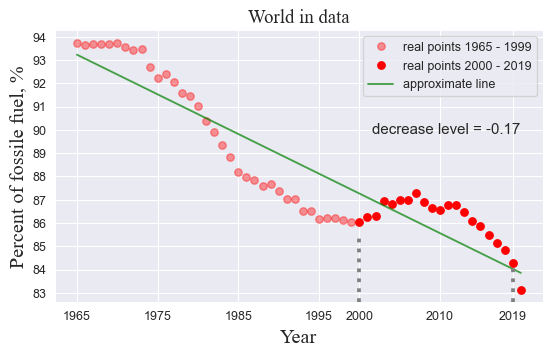

In [16]:
sns.set_style('darkgrid')
plt.figure(figsize = (7, 4), dpi = 90)
plt.title("World in data", fontdict = {"fontname" : "Times New Roman", "fontsize" : 15})

plt.plot(World_data['year'][0:35], World_data['percent_of_fossil'][0:35]*100, "ro", alpha =.4 )
plt.plot(World_data['year'][35:], World_data['percent_of_fossil'][35:]*100, "ro", alpha = 1 )
plt.plot(World_data['year'], k*World_data['year'] + b, "g-", alpha = .7)

plt.xlabel("Year", fontdict = {"fontname" : "Times New Roman", "fontsize" : 16}, labelpad = 5)
plt.ylabel("Percent of fossile fuel, %", fontdict = {"fontname" : "Times New Roman", "fontsize" : 16})
plt.legend(["real points 1965 - 1999","real points 2000 - 2019" ,"approximate line",])

plt.yticks([83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94])
plt.xticks([1965, 1975, 1985, 1995, 2000, 2010, 2019])

plt.text(2011, 90, "decrease level = {:.2f} ".format(k), ha="center", va="center", fontsize = 12)

for key, value in dict(zip([2000, 2019],World_data.loc[World_data['year'].isin([2000, 2019]), 'percent_of_fossil'])).items():
    plt.axvline(x =key, c = 'gray', ls = ':', lw = 3, ymax = (value - .825)/0.14);
print("k ={:.2f} ".format(k))

plt.show()

#### Note: primary energy consumption = fossil fuel consumption + renewables consumption + nuclear consumption
#### fossil fuel consumption = oil + gas + coal
#### renewables consumption = hydro energy consumption + other renewable consumption + bio fuel consumption + wind consumption + solar consumption

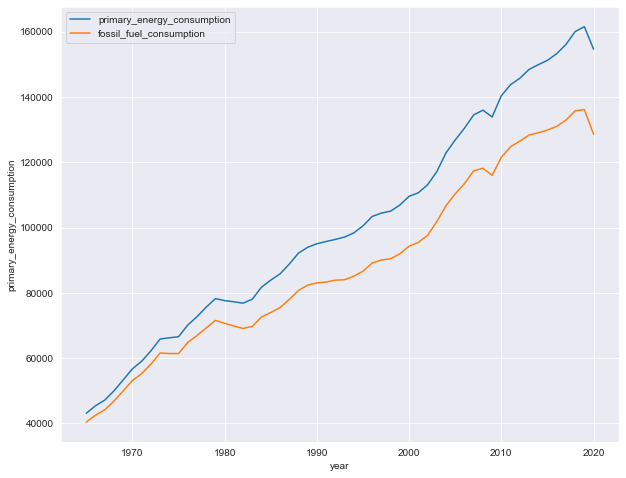

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

sns.lineplot(x=World_data['year'], y=World_data['primary_energy_consumption'])
sns.lineplot(x=World_data['year'], y=World_data['fossil_fuel_consumption'])

plt.legend(['primary_energy_consumption', 'fossil_fuel_consumption'])

plt.show()

In [18]:
World_data_1 = World_data.copy()
World_data_1['consumtion_diff'] = World_data[['country', 'primary_energy_consumption']].groupby('country').diff(1)
World_data_1['consumtion_fossil_diff'] = World_data[['country', 'fossil_fuel_consumption']].groupby('country').diff(1)

In [19]:
World_data_1.head(5)

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita,percent_of_fossil,percent_of_renewable,percent_of_nuclear,consumtion_diff,consumtion_fossil_diff
16663,OWID_WRL,World,1965,1.974,317.091,7.168,510.879,11.323,1854.331,NaN,...,0.0,NaN,0.0,0.0,0.0,0.937509,0.060637,0.001645,NaN,NaN
16664,OWID_WRL,World,1966,1.387,227.165,7.600,580.554,8.588,1565.729,5.344,...,0.0,0.0,0.0,0.0,0.0,0.936313,0.061379,0.002106,2304.079,2105.753
16665,OWID_WRL,World,1967,-3.552,-589.897,7.618,626.097,7.282,1441.652,3.757,...,0.0,0.0,0.0,0.0,0.0,0.936925,0.060460,0.002417,1706.450,1626.614
16666,OWID_WRL,World,1968,2.784,445.937,9.389,830.439,9.095,1931.569,6.053,...,0.0,0.0,0.0,0.0,0.0,0.936809,0.060104,0.002896,2852.403,2666.715
16667,OWID_WRL,World,1969,2.023,333.027,9.820,950.186,7.640,1770.302,6.698,...,0.0,0.0,0.0,0.0,0.0,0.936957,0.059643,0.003218,3347.661,3143.986


### Exlude backgroung

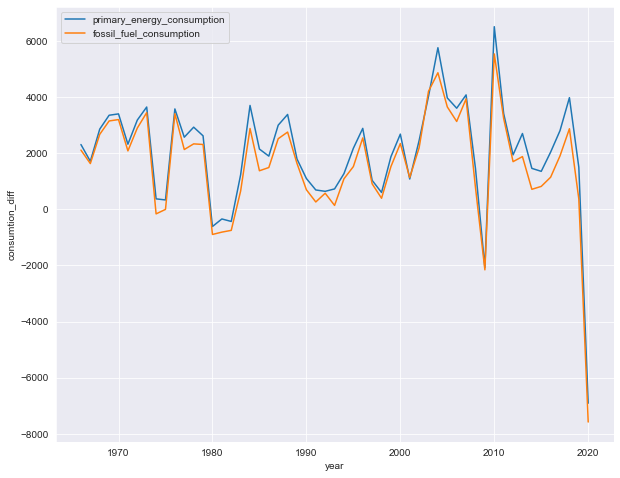

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

sns.lineplot(x=World_data_1['year'], y=World_data_1['consumtion_diff'])
sns.lineplot(x=World_data_1['year'], y=World_data_1['consumtion_fossil_diff'])

plt.legend(['primary_energy_consumption', 'fossil_fuel_consumption'])

plt.show()

### Values of the "percent_of_renewable" for certain years

In [21]:
World_data[World_data['year'] == 1973]['percent_of_renewable'], World_data[World_data['year'] == 2019]['percent_of_renewable']

(16671    0.056316
 Name: percent_of_renewable, dtype: float64,
 16717    0.114375
 Name: percent_of_renewable, dtype: float64)

### Values of the "percent_of_nuclear" for certain years  

In [22]:
World_data[World_data['year'] == 1973]['percent_of_nuclear'], World_data[World_data['year'] == 1999]['percent_of_nuclear']

(16671    0.008601
 Name: percent_of_nuclear, dtype: float64,
 16697    0.065595
 Name: percent_of_nuclear, dtype: float64)

See how the components changed in primary energy consumption.
Rapid growth of "Renewables" after 2001 - 2002 and a slowdown in growth in the mid-80s and then a decline in the early 2000s of "Nuclear".

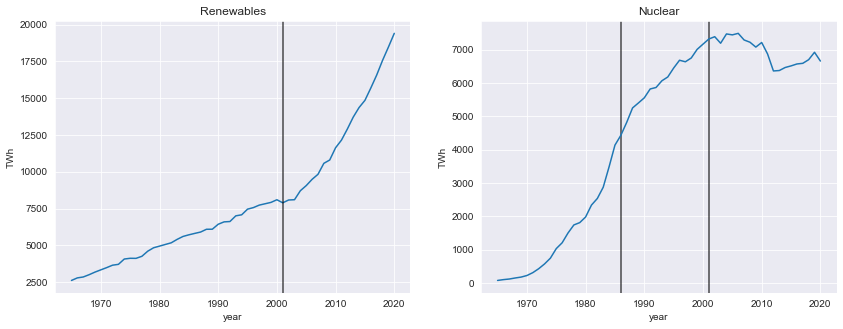

In [23]:
figure, axis = plt.subplots(1,2)
figure.set_size_inches(14, 5)

axis[0].plot(World_data['year'], World_data['renewables_consumption'])
axis[0].set_title('Renewables')
axis[0].set_xlabel('year'), axis[1].set_xlabel('year')
axis[0].set_ylabel('TWh'), axis[1].set_ylabel('TWh')

axis[0].axvline(x = 2001, c = 'black', alpha = .7)
axis[1].axvline(x = 1986, c = 'black', alpha = .7)
axis[1].axvline(x = 2001, c = 'black', alpha = .7)

axis[1].plot(World_data['year'], World_data['nuclear_consumption'])
axis[1].set_title('Nuclear')

plt.show()

### Europe VS Others

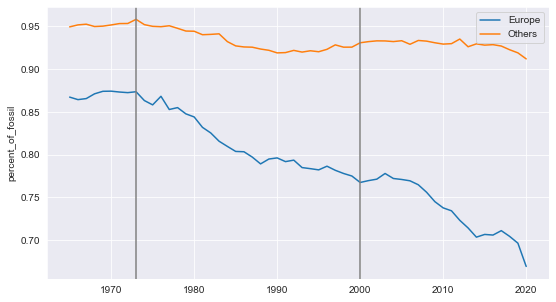

In [24]:
figure, axis = plt.subplots()
figure.set_size_inches(9, 5)

#sns.lineplot(x =Total_data['year'].unique(),y =Total_data['percent_of_fossil'].groupby(Total_data['year']).mean())
sns.lineplot(x = Europe_data['year'].unique(),y = Europe_data['percent_of_fossil'].groupby(Europe_data['year']).mean())
sns.lineplot(x = Others_data['year'].unique(),y = Others_data['percent_of_fossil'].groupby(Others_data['year']).mean())

plt.legend([ 'Europe', 'Others'])
plt.axvline(x = 1973, c = 'grey'), plt.axvline(x = 2000, c = 'grey')

plt.show()


### Percentage values at the beginning of the observed period

In [25]:
Europe_data['percent_of_renewable'].groupby(Europe_data['year']).mean().head(1), Others_data['percent_of_renewable'].groupby(Others_data['year']).mean().head(1)

(year
 1965    0.131506
 Name: percent_of_renewable, dtype: float64,
 year
 1965    0.050428
 Name: percent_of_renewable, dtype: float64)

### Countries, that had values of "percent_of_renewable" >= 0.5

In [26]:
Total_data[Total_data['percent_of_renewable']>=0.5].groupby('country').tail(1).sort_values('year').reset_index()[['year','country', 'percent_of_renewable']]

,year,country,percent_of_renewable
0,2020,Iceland,0.827394
1,2020,Norway,0.696151


### Countries, that had values  of "percent_of_fossil" <= 0.5

In [27]:
Total_data[Total_data['percent_of_fossil']<=0.5].groupby('country').tail(1).sort_values('year').reset_index()[['year','country', 'percent_of_fossil']]

,year,country,percent_of_fossil
0,2020,France,0.498087
1,2020,Iceland,0.169609
2,2020,Norway,0.293402
3,2020,Sweden,0.299161
4,2020,Switzerland,0.454130


In [28]:
renew_max = pd.DataFrame(columns = ['year', 'country', 'percent_of_renewable'])

for country in Total_data['country'].unique():
    max = Total_data.loc[Total_data['country'] == country].percent_of_renewable.max()
    imax = Total_data.loc[(Total_data['percent_of_renewable'] == max) & (Total_data['country'] == country), ['year', 'country', 'percent_of_renewable']]
    renew_max = renew_max.append(imax, ignore_index=True)

In [29]:
fossil_min = pd.DataFrame(columns = ['year', 'country', 'percent_of_fossil'])

for country in Total_data['country'].unique():
    min = Total_data.loc[Total_data['country'] == country].percent_of_fossil.min()
    imin = Total_data.loc[(Total_data['percent_of_fossil'] == min) & (Total_data['country'] == country), ['year', 'country', 'percent_of_fossil']]
    fossil_min = fossil_min.append(imin, ignore_index=True)

### The 10 biggest values of "percent_of_renewable"

In [30]:
renew_max.sort_values('percent_of_renewable', ascending = False).reset_index(drop = True).head(10)

,year,country,percent_of_renewable
0,2012,Iceland,0.828351
1,1990,Norway,0.711796
2,2020,Sweden,0.483461
3,1981,New Zealand,0.456431
4,1967,Switzerland,0.406269
5,2020,Austria,0.363922
6,1990,Sri Lanka,0.362009
7,2020,Denmark,0.343431
8,2020,Portugal,0.301991
9,2020,Finland,0.301271


In [31]:
Others_data

,year,country,primary_energy_consumption,fossil_fuel_consumption,renewables_consumption,population,percent_of_fossil,percent_of_renewable,nuclear_consumption,percent_of_nuclear
3400,1965,China,1532.234,1470.855,61.381,724219008.0,0.959941,0.040060,0.0,0.0
3401,1966,China,1665.278,1602.819,62.461,742414848.0,0.962493,0.037508,0.0,0.0
3402,1967,China,1497.595,1443.753,53.843,762581184.0,0.964048,0.035953,0.0,0.0
3403,1968,China,1512.597,1449.070,63.529,784074688.0,0.958001,0.042000,0.0,0.0
3404,1969,China,1841.018,1776.410,64.609,805985920.0,0.964906,0.035094,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
16446,2016,Vietnam,857.925,691.114,166.811,93640440.0,0.805565,0.194435,0.0,0.0
16447,2017,Vietnam,918.556,695.766,222.791,94600640.0,0.757456,0.242545,0.0,0.0
16448,2018,Vietnam,1035.414,824.193,211.221,95545960.0,0.796003,0.203997,0.0,0.0
16449,2019,Vietnam,1157.319,979.427,177.893,96462112.0,0.846290,0.153711,0.0,0.0


In [32]:
Others_data.loc[Others_data['country'] == 'Sri Lanka'].tail(1)

,year,country,primary_energy_consumption,fossil_fuel_consumption,renewables_consumption,population,percent_of_fossil,percent_of_renewable,nuclear_consumption,percent_of_nuclear
14165,2020,Sri Lanka,90.734,75.662,15.072,21413250.0,0.833888,0.166112,0.0,0.0


### The 10 smallest values of "percent_of_fossil"

In [33]:
fossil_min.sort_values('percent_of_fossil', ascending = True).reset_index(drop = True).head(10)

,year,country,percent_of_fossil
0,2020,Iceland,0.169609
1,1990,Norway,0.288204
2,2020,Sweden,0.299161
3,2020,Switzerland,0.454130
4,2014,France,0.496671
5,2020,Finland,0.508065
6,1981,New Zealand,0.543569
7,2020,Austria,0.636078
8,1990,Sri Lanka,0.637991
9,2020,Denmark,0.641294


In [34]:
Total_data[(Total_data['country']=='Sweden') & (Total_data['year']==2015)] 

,year,country,primary_energy_consumption,fossil_fuel_consumption,renewables_consumption,population,percent_of_fossil,percent_of_renewable,nuclear_consumption,percent_of_nuclear
14442,2015,Sweden,603.843,190.277,271.019,9764949.0,0.31511,0.448824,142.547,0.236066


In [35]:
Total_data[['year', 'country', 'percent_of_renewable']].groupby('country').max('percent_of_renewable')\
.sort_values('percent_of_renewable', ascending=False).head(10)

,year,percent_of_renewable
country,,
Iceland,2020,0.828351
Norway,2020,0.711796
Sweden,2020,0.483461
New Zealand,2020,0.456431
Switzerland,2020,0.406269
Austria,2020,0.363922
Sri Lanka,2020,0.362009
Denmark,2020,0.343431
Portugal,2020,0.301991


### The Distributions are different 

In [36]:
conditions = [(Total_data['country'].isin(Europe_list)), (Total_data['country'].isin(Others_list))]
values  = ['Eur', 'Oth']
Total_data['country_list'] = np.select(conditions, values)

C:\Users\milan\AppData\Local\Temp/ipykernel_3404/502757864.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Total_data['country_list'] = np.select(conditions, values)


In [37]:
grouped_data = Total_data[['year','country_list', 'percent_of_fossil']].groupby(['country_list', 'year']).mean()
grouped_data = grouped_data.reset_index()

In [38]:
#grouped_data[grouped_data['year'] >=2005]

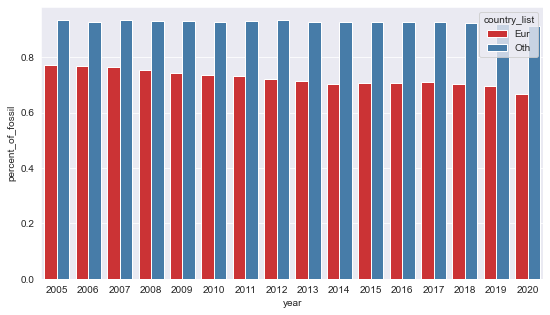

In [39]:
figure, axis = plt.subplots()
figure.set_size_inches(9, 5)

sns.barplot(x = 'year', y = 'percent_of_fossil', data = grouped_data[grouped_data['year'] >=2005], palette = 'Set1', hue = 'country_list')
#plt.legend(loc =  7, title = 'period')

plt.show()

In [40]:
Total_data.loc[Total_data['percent_of_fossil']>1]

,year,country,primary_energy_consumption,fossil_fuel_consumption,renewables_consumption,population,percent_of_fossil,percent_of_renewable,nuclear_consumption,percent_of_nuclear,country_list


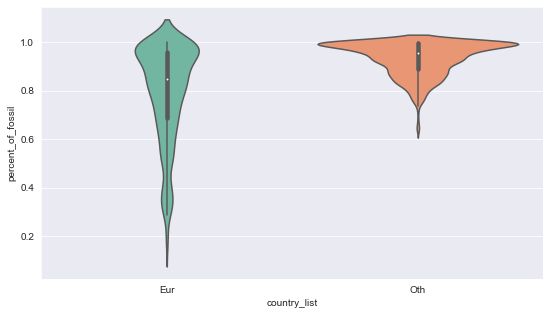

In [41]:
figure, axis = plt.subplots()
figure.set_size_inches(9, 5)

sns.violinplot(x = 'country_list', y = 'percent_of_fossil', data = Total_data, palette = 'Set2')
#plt.legend(loc =  7, title = 'period')

plt.show()

The distributions look like Non-normal but it seems that (1 - our distribution) will be closer to "Expon" distribution. 

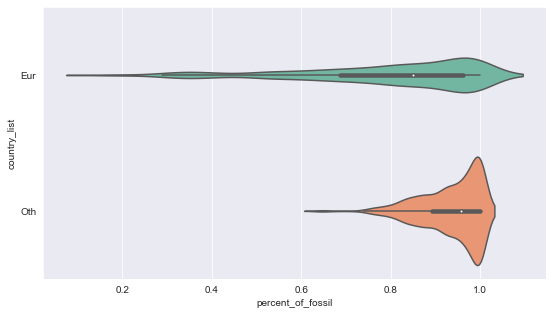

In [42]:
figure, axis = plt.subplots()
figure.set_size_inches(9, 5)

sns.violinplot(x = 'percent_of_fossil', y = 'country_list', data = Total_data, palette = 'Set2', orient='h')
#plt.legend(loc =  7, title = 'period')

plt.show()

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


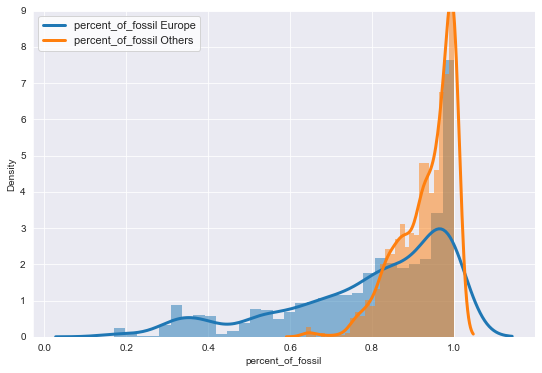

In [43]:
fig, ax = plt.subplots(1, 1)
#plt.figure(figsize = (9,6))
fig.set_size_inches(9,6)
sns.set_theme(style = 'whitegrid')

for a in [Europe_data, Others_data]:
    sns.distplot(a['percent_of_fossil'].dropna() , bins = 30, kde_kws={"lw": 3, "label": "KDE"}, 
                hist_kws={"histtype": "bar", "linewidth": 0, "alpha": .5})
    plt.legend([a.columns[6] + ' Europe',a.columns[6] + ' Others' ])

#ax.set(xlim = [0, 0.5])
ax.set(ylim = [0, 9])

plt.show()

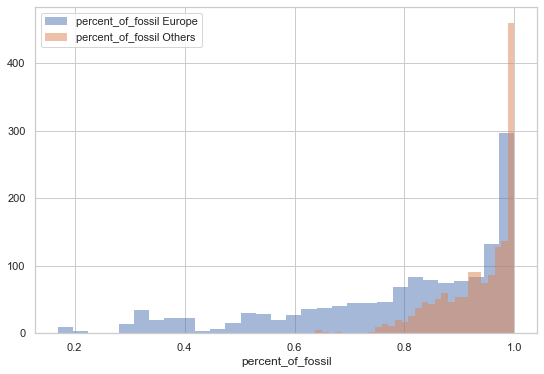

In [86]:
fig, ax = plt.subplots(1, 1)
#plt.figure(figsize = (9,6))
fig.set_size_inches(9,6)
sns.set_theme(style = 'whitegrid')

for a in [Europe_data, Others_data]:
    sns.distplot(a['percent_of_fossil'].dropna() , bins = 30, kde=False, 
                hist_kws={"histtype": "bar", "linewidth": 0, "alpha": .5})
    plt.legend([a.columns[6] + ' Europe',a.columns[6] + ' Others' ])

#ax.set(xlim = [0, 0.5])
#ax.set(ylim = [0, 9])

plt.show()

In [44]:
x = scipy.stats.expon.rvs(loc = 0, scale = 1/8, size = np.max([Europe_data["percent_of_fossil"].shape[0], Others_data["percent_of_fossil"].shape[0]]))
y = np.linspace(scipy.stats.expon.ppf(0.001), scipy.stats.expon.ppf(0.999))

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

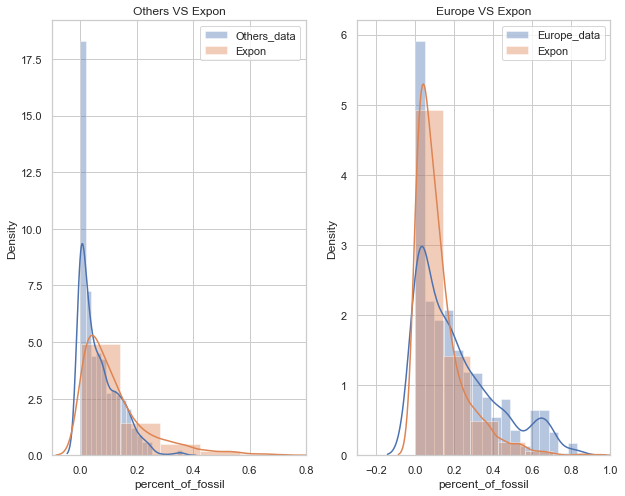

In [45]:
fig, ax = plt. subplots(1,2)
fig.set_size_inches(10,8)

sns.distplot((1 - Europe_data['percent_of_fossil'].dropna()), label = 'Europe_data', ax = ax[1])
sns.distplot(x,y, label = 'Expon', ax = ax[1])

sns.distplot((1 - Others_data['percent_of_fossil'].dropna()), label = 'Others_data', ax = ax[0])
sns.distplot(x,y, label = 'Expon', ax = ax[0])

ax[0].legend()
ax[1].legend()

ax[0].set_title("Others VS Expon")
ax[1].set_title("Europe VS Expon")

ax[0].set(xlim = [-0.1, 0.8])
ax[1].set(xlim = [-0.3, 1])

plt.show()

And then we can do Kolmogorov–Smirnov test to check whether our distributions are similar to the exponential distribution.
Note that we have zero meaningful values we can't get rid of and that is why we can't logarithm for example.

In [46]:
print([scipy.stats.kstest((1 - Europe_data['percent_of_fossil'].dropna()),'expon', args = ( 0, 1/5)), 
       
    scipy.stats.kstest((1 - Others_data['percent_of_fossil'].dropna()),'expon', args = ( 0, 1/25))])

# You can try to change args and and see how the p-value changes
# Also you can try another sest of data, Europe_data_1 or Others_data_1 for example or try "percent_of_renewable" column

print("As you can see p-values are too small")

[KstestResult(statistic=0.09827871162222036, pvalue=3.1900823619897203e-12), KstestResult(statistic=0.2192109479547184, pvalue=1.209130082766359e-66)]
As you can see p-values are too small


### Different statistics of the distributions

In [47]:
Europe_data.describe()

,year,primary_energy_consumption,fossil_fuel_consumption,renewables_consumption,population,percent_of_fossil,percent_of_renewable,nuclear_consumption,percent_of_nuclear
count,1421.000000,1400.000000,1400.000000,1400.000000,1.421000e+03,1400.000000,1400.000000,1400.000000,1400.000000
mean,1992.921182,766.326490,631.751006,67.367251,1.906308e+07,0.793075,0.145656,67.027560,0.060460
std,16.413563,944.196852,819.597112,91.077051,2.200066e+07,0.201821,0.186725,177.334127,0.091166
min,1965.000000,4.680000,4.680000,0.000000,1.923150e+05,0.169609,0.000000,0.000000,0.000000
25%,1979.000000,214.545750,157.928750,5.544000,5.154906e+06,0.686257,0.011848,0.000000,0.000000
50%,1993.000000,359.322000,250.118000,30.000000,9.660749e+06,0.850381,0.064459,0.004000,0.000021
75%,2007.000000,887.964250,811.811750,91.962750,2.283055e+07,0.962026,0.238003,53.006000,0.106735
max,2021.000000,4375.906000,4176.212000,658.545000,8.390047e+07,1.000000,0.828351,1214.557000,0.404182


In [48]:
Others_data.describe()

,year,primary_energy_consumption,fossil_fuel_consumption,renewables_consumption,population,percent_of_fossil,percent_of_renewable,nuclear_consumption,percent_of_nuclear
count,1568.000000,1568.000000,1568.000000,1568.000000,1.568000e+03,1568.000000,1568.000000,1568.000000,1568.000000
mean,1992.500000,2051.985209,1854.953684,117.059761,1.205868e+08,0.934399,0.053954,79.861661,0.011469
std,16.168386,5389.269029,4789.070973,395.731757,2.727538e+08,0.068542,0.063611,321.283955,0.032214
min,1965.000000,0.855000,0.855000,0.000000,7.363100e+04,0.637991,0.000000,0.000000,0.000000
25%,1978.750000,108.044500,103.003500,0.304000,5.941546e+06,0.891347,0.001293,0.000000,0.000000
50%,1992.500000,330.297500,312.403000,10.141500,2.848469e+07,0.957044,0.034401,0.000000,0.000000
75%,2006.250000,1168.207250,1106.544000,58.135000,8.192556e+07,0.998664,0.074122,0.000000,0.000000
max,2020.000000,40404.443000,34075.189000,5425.827000,1.439324e+09,1.000000,0.362009,2254.808000,0.199646


In [49]:
#scipy.stats.skew(Europe_data['percent_of_fossil'].dropna()), scipy.stats.skew(Others_data['percent_of_fossil'].dropna())

In [50]:
def ppf_func(array):
    array = pd.array(array).dropna()
    if len(array) < 100:
        #print(array)
        print("Be careful, accuracy is less than 0.01")
    perc_1, perc_3 = np.nan, np.nan
    i = 1
    for i in range (1, len(array)):
        if np.isnan(perc_1):
            if i/len(array) >= 0.25:
                perc_1 = np.sort(array)[i-1]
        if np.isnan(perc_3):       
            if i/len(array) >= 0.75:
                perc_3 = np.sort(array)[i-1]
    return perc_1, perc_3

### Values of the 1 and 3 quantiles of "percent_of_fossil" for both data sets 

In [51]:
[ppf_func(Europe_data['percent_of_fossil']), ppf_func(Others_data['percent_of_fossil'])]

[(0.6847039117514304, 0.9619806348817257),
 (0.8911148204388144, 0.9986640225446196)]

C:\Users\milan\AppData\Local\Temp/ipykernel_3404/2541730993.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-o" (-> color='b'). The keyword argument will take precedence.
  plt.plot(ppf_func(Europe_data['percent_of_fossil']), (np.zeros_like(ppf_func(Europe_data['percent_of_fossil'])) - .5), 'b-o', c = 'red')


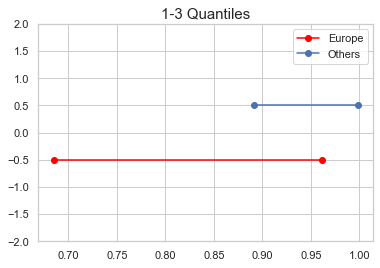

In [52]:
fig, ax = plt.subplots()

plt.plot(ppf_func(Europe_data['percent_of_fossil']), (np.zeros_like(ppf_func(Europe_data['percent_of_fossil'])) - .5), 'b-o', c = 'red')
plt.plot(ppf_func(Others_data['percent_of_fossil']), (np.zeros_like(ppf_func(Others_data['percent_of_fossil'])) + .5), 'b-o')

plt.legend(['Europe', 'Others'])

ax.set(ylim = (-2, 2))
ax.set_title('1-3 Quantiles', fontsize = 15)

plt.show()

### Medians of 'percent_of_fossil' for both data sets  

In [53]:
np.median(Europe_data['percent_of_fossil'].dropna()), np.median(Others_data['percent_of_fossil'].dropna())

(0.8503812773408522, 0.957043589262123)

### Non-Normal Distribution
Two ways to show that the distributions aren't normal

D:\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
D:\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


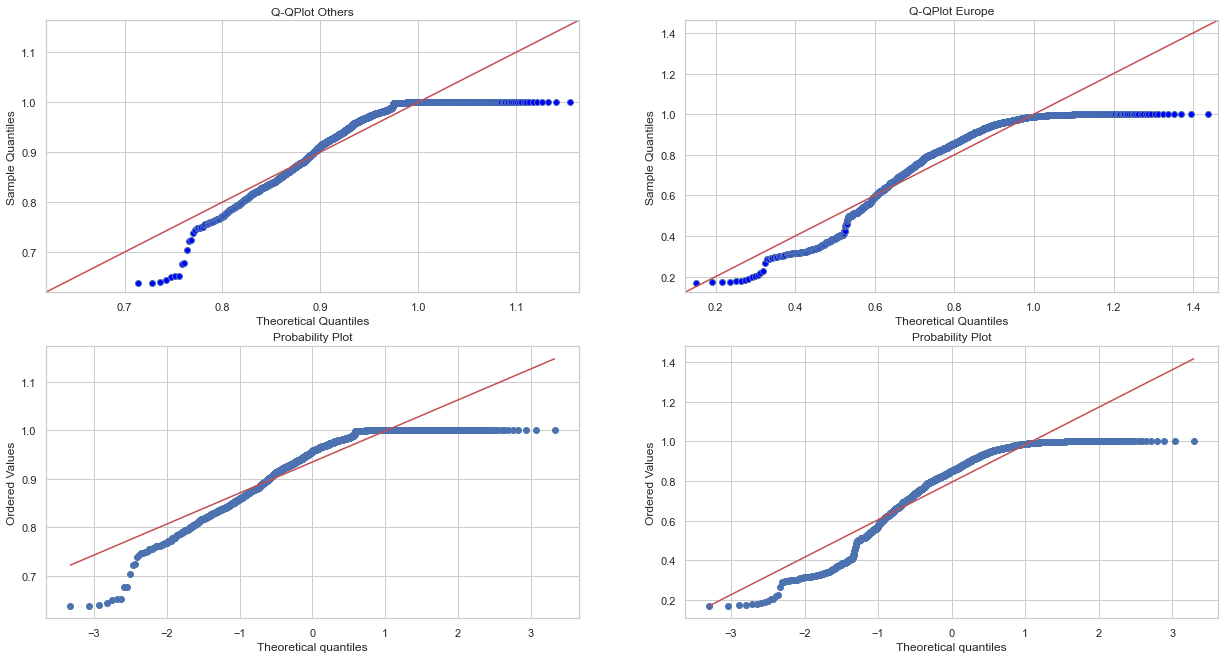

In [54]:
loc_e = Europe_data['percent_of_fossil'].dropna().mean()
loc_o = Others_data['percent_of_fossil'].dropna().mean()
scale_e = Europe_data['percent_of_fossil'].dropna().std()
scale_o = Others_data['percent_of_fossil'].dropna().std()

fig, ax = plt.subplots(2,2)
fig.set_size_inches(21,11)

sm.qqplot(Others_data['percent_of_fossil'].dropna(), loc = loc_o, scale = scale_o, ax = ax[0,0], line = '45')
sm.qqplot(Europe_data['percent_of_fossil'].dropna(), loc = loc_e, scale = scale_e, ax = ax[0,1], line = '45')

ax[0,0].set_title('Q-QPlot Others')
ax[0,1].set_title('Q-QPlot Europe')

scipy.stats.probplot(Europe_data['percent_of_fossil'].dropna(), plot = ax[1,1])
scipy.stats.probplot(Others_data['percent_of_fossil'].dropna(), plot = ax[1,0])

plt.show()

### The Shapiro–Wilk test of normality
### H0 (Null hypothesis) - the distribution is normal

In [55]:
loc = Europe_data['percent_of_fossil'].dropna().mean()
scale = Europe_data['percent_of_fossil'].dropna().std()

scipy.stats.shapiro((Europe_data['percent_of_fossil'].dropna() - loc)/scale)

ShapiroResult(statistic=0.873235821723938, pvalue=2.919190638611009e-32)

### Nonparametric Mann–Whitney U test (H0 - Europe_data.percent_of_fossil > Others_data.percent_of_fossil)

In [56]:
Europe_data[['year', 'percent_of_fossil']].dropna().sample(5)

,year,percent_of_fossil
6108,1990,0.886132
8880,1972,0.996636
7106,2001,0.861265
2520,1986,0.883243
7121,2016,0.800342


In [57]:
print(scipy.stats.mannwhitneyu(Europe_data.percent_of_fossil.dropna(), Others_data.percent_of_fossil.dropna(), alternative ='less'), 'p-value is about 0')

MannwhitneyuResult(statistic=594953.0, pvalue=1.3771046522397704e-103) p-value is about 0


###  Nonparametric Wilcoxon signed-rank test  (H0 - Europe_data.percent_of_fossil > Others_data.percent_of_fossil)

In [58]:
print(scipy.stats.wilcoxon(Europe_data.percent_of_fossil, 
    np.random.choice(Others_data.percent_of_fossil, size = Europe_data.percent_of_fossil.shape[0]), alternative ='less'), 'and again')

WilcoxonResult(statistic=171758.0, pvalue=1.4594051719091426e-101) and again


In [59]:
#Europe_data.loc[Europe_data['percent_of_fossil'] > 0.8525049909687233].count()

#### Creating a new column with the change in 'percent_of_fossil'

In [60]:
Europe_data['diff'] = Europe_data[['country','percent_of_fossil']].groupby('country').diff(1)
Others_data['diff'] = Others_data[['country','percent_of_fossil']].groupby('country').diff(1)

C:\Users\milan\AppData\Local\Temp/ipykernel_3404/4171108043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Europe_data['diff'] = Europe_data[['country','percent_of_fossil']].groupby('country').diff(1)
C:\Users\milan\AppData\Local\Temp/ipykernel_3404/4171108043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Others_data['diff'] = Others_data[['country','percent_of_fossil']].groupby('country').diff(1)


In [61]:
#Europe_data

In [62]:
#Europe_data = Europe_data.drop('diff', axis = 1)
#Others_data = Others_data.drop('diff', axis = 1)

### Changes in time

In [63]:
Others_data_0 = All_from1965.loc[(All_from1965['country'].isin(Others_list)) & (All_from1965['year'] >= 1965) & (All_from1965['year'] < 1999)]
Others_data_1 = All_from1965.loc[(All_from1965['country'].isin(Others_list)) & (All_from1965['year'] >= 1999) & (All_from1965['year'] < 2020)]

In [64]:
Europe_data_0 = All_from1965.loc[(All_from1965['country'].isin(Europe_list)) & (All_from1965['year'] >= 1965) & (All_from1965['year'] < 1999) ]
Europe_data_1 = All_from1965.loc[(All_from1965['country'].isin(Europe_list)) & (All_from1965['year'] >= 1999) & (All_from1965['year'] < 2020) ]

In [65]:
Total_data_0 = All_from1965.loc[(All_from1965['country'].isin(All_list)) & (All_from1965['year'] >= 1965) & (All_from1965['year'] < 1999)]
Total_data_1 = All_from1965.loc[(All_from1965['country'].isin(All_list)) & (All_from1965['year'] >= 1999) & (All_from1965['year'] < 2020)]

### Creating a new column with time period sign

In [66]:
conditions = [(Total_data['year'] < 1999), (Total_data['year'] >= 1999)]
values  = ['0', '1']
Total_data['time_period'] = np.select(conditions, values)

C:\Users\milan\AppData\Local\Temp/ipykernel_3404/3990402845.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Total_data['time_period'] = np.select(conditions, values)


### 'Percent_of_fossil' in (1965-1999) VS (2000-2019)

0 - period from 1965 to 1999
1 - period from 2000 to 2019


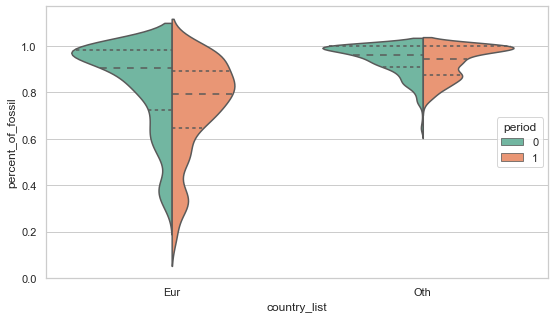

In [67]:
figure, axis = plt.subplots()
figure.set_size_inches(9, 5)

sns.violinplot(x = 'country_list', y = 'percent_of_fossil', data = Total_data, palette = 'Set2', 
               hue ='time_period', split = True, inner = 'quartilles')
plt.legend(loc =  7, title = 'period')

print('0 - period from 1965 to 1999\n1 - period from 2000 to 2019')

As you can see there are visible changes in shapes of distributions

### The difference in trends 
Do polyfit to get level of trend (k in y = k*x + b) for the approximation line  of the first degree.

In [68]:
europe_k, europe_b =  np.polyfit(np.arange(1973,2000,1), Europe_data['percent_of_fossil'].groupby(Europe_data['year']).mean()[8:35], 1)
europe_k1, europe_b1 = np.polyfit(np.arange(2000,2020,1), Europe_data['percent_of_fossil'].groupby(Europe_data['year']).mean()[35:55], 1)

others_k, others_b =  np.polyfit(np.arange(1973,2000,1), Others_data['percent_of_fossil'].groupby(Others_data['year']).mean()[8:35], 1)
others_k1, others_b1 = np.polyfit(np.arange(2000,2020,1), Others_data['percent_of_fossil'].groupby(Others_data['year']).mean()[35:55], 1)

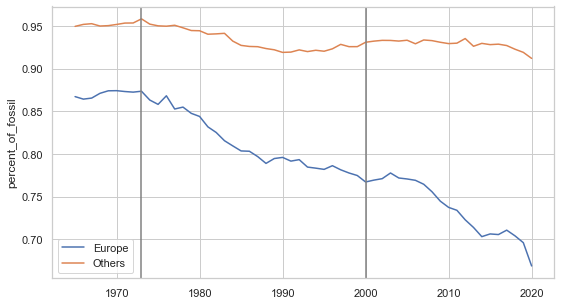

Europe decrease level in (1973 - 1999) = -0.00388
Europe decrease level in (2000 - 2019) = -0.00474 
Others decrease level in (1973 - 1999) = -0.00141
Others decrease level in (2000 - 2019) = -0.00048


In [69]:
figure, axis = plt.subplots()
figure.set_size_inches(9, 5)

#sns.lineplot(x =Total_data['year'].unique(),y =Total_data['percent_of_fossil'].groupby(Total_data['year']).mean())
sns.lineplot(x = Europe_data['year'].unique(),y = Europe_data['percent_of_fossil'].groupby(Europe_data['year']).mean())
sns.lineplot(x = Others_data['year'].unique(),y = Others_data['percent_of_fossil'].groupby(Others_data['year']).mean())

plt.legend(['Europe', 'Others'])
plt.axvline(x = 1973, c = 'grey'), plt.axvline(x = 2000, c = 'grey')

plt.show() 

print(f'Europe decrease level in (1973 - 1999) = {europe_k:.5f}\nEurope decrease level in (2000 - 2019) = {europe_k1:.5f}', 
      f'\nOthers decrease level in (1973 - 1999) = {others_k:.5f}\nOthers decrease level in (2000 - 2019) = {others_k1:.5f}')

### Comparison of "diff" values

In [70]:
others_mean_0, others_mean_1 = Others_data['diff'].dropna().loc[Others_data['year'] < 2000].mean(), Others_data['diff'].dropna().loc[Others_data['year'] >= 2000].mean()
print(others_mean_0, others_mean_1, (others_mean_1 - others_mean_0)/others_mean_0) 

-0.0006984528611274037 -0.0006553298408069377 -0.06174077410300702


In [71]:
mean_o, std_o = Others_data['diff'].dropna().mean(), Others_data['diff'].dropna().std()

print(f'mean = {round(mean_o, 3)}', f' std = {round(std_o, 3)}')

mean = -0.001  std = 0.014


In [72]:
europe_mean_0, europe_mean_1 = Europe_data['diff'].dropna().loc[Europe_data['year'] < 2000].mean(), Europe_data['diff'].dropna().loc[Europe_data['year'] >= 2000].mean()
print(europe_mean_0, europe_mean_1, (europe_mean_1 - europe_mean_0)/europe_mean_0) 

-0.0027191152535212437 -0.005044807185684545 0.8553120097250527


In [73]:
mean_e, std_e = Europe_data['diff'].dropna().mean(), Europe_data['diff'].dropna().std()

print(f'mean = {round(mean_e, 3)}', f' std = {round(std_e, 3)}')

mean = -0.004  std = 0.019


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


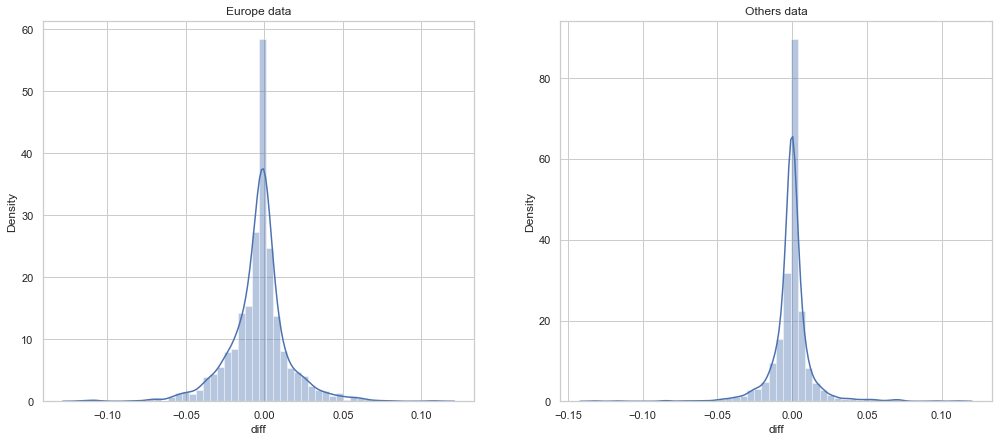

In [74]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(17,7)

sns.distplot(Europe_data['diff'].dropna(), ax = ax[0])
sns.distplot(Others_data['diff'].dropna(), ax = ax[1])

ax[0].set_title('Europe data')    
ax[1].set_title('Others data')

plt.show()

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


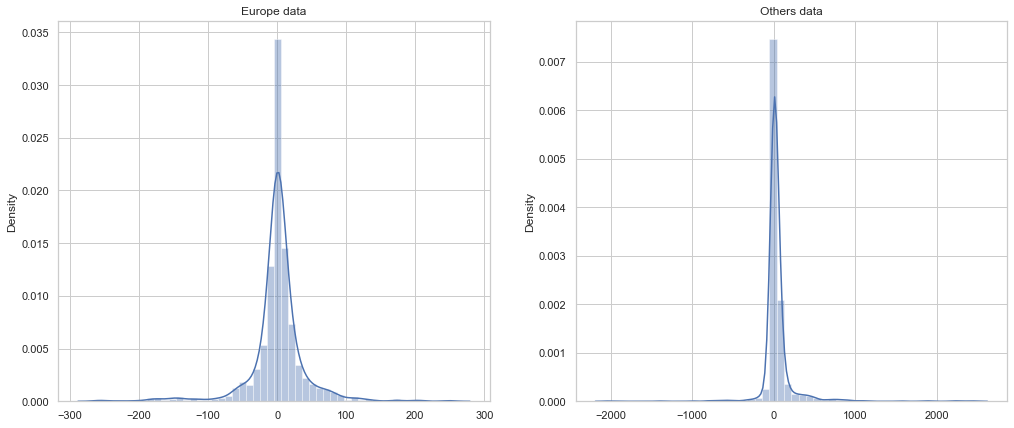

In [75]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(17,7)

sns.distplot(Europe_data[['country', 'fossil_fuel_consumption']].groupby('country').diff(1), ax = ax[0])
sns.distplot(Others_data[['country', 'fossil_fuel_consumption']].groupby('country').diff(1), ax = ax[1])

ax[0].set_title('Europe data')    
ax[1].set_title('Others data')

plt.show()

In [76]:
Europe_data['diff'].mean(), Others_data['diff'].mean()

(-0.003607106718529052, -0.000681987707914135)

In [77]:
Europe_cumsum_diff = Europe_data[['country', 'fossil_fuel_consumption']].groupby('country').diff(1).mean()
Others_cumsum_diff = Others_data[['country', 'fossil_fuel_consumption']].groupby('country').diff(1).mean()

Europe_cons_mean = Europe_data['fossil_fuel_consumption'].mean()
Others_cons_mean = Others_data['fossil_fuel_consumption'].mean()

In [78]:
Europe_cumsum_diff, Europe_cons_mean, Others_cumsum_diff, Others_cons_mean

(fossil_fuel_consumption    0.929135
 dtype: float64,
 631.7510057142848,
 fossil_fuel_consumption    46.698448
 dtype: float64,
 1854.9536836734699)

In [79]:
Europe_cumsum_diff/Europe_cons_mean, Others_cumsum_diff/Others_cons_mean

(fossil_fuel_consumption    0.001471
 dtype: float64,
 fossil_fuel_consumption    0.025175
 dtype: float64)

In [80]:
Europe_data['diff'].sum(), Others_data['diff'].sum()

(-4.959771737977444, -1.0502610701877677)

In [ ]:
Others_data[['country', 'year', 'diff', 'fossil_fuel_consumption']].groupby('country').\
agg({'diff':'mean', 'fossil_fuel_consumption':'mean'}, axis=0).sort_values(['diff', 'fossil_fuel_consumption'])

These distributions non-normal too. They have high positive kurtosis.The distribution with a higher kurtosis has a heavier tail. We can check it by finding kurtosis values.

In [ ]:
Europe_data[['country', 'year', 'diff', 'fossil_fuel_consumption']].groupby('country').\
agg({'diff':'mean', 'fossil_fuel_consumption':'mean'}, axis=0).sort_values(['diff', 'fossil_fuel_consumption'])

In [ ]:
scipy.stats.kurtosis(Others_data['diff'].dropna()), scipy.stats.kurtosis(Europe_data['diff'].dropna())

print('In this test Kurtosis for normal distribution should  be about 0')

Example for comparison tails.

In [ ]:
norm_array = scipy.stats.norm.rvs(loc = mean_e , scale = std_e, size = 10000)

In [ ]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(17,10)

sns.distplot(norm_array, label = 'Normal_data', ax = ax[0])
sns.distplot(Europe_data['diff'].dropna(), label = 'Europe_data', ax = ax[0])

sns.distplot(norm_array, label = 'Normal_data', ax = ax[1])
sns.distplot(Others_data['diff'].dropna(), label = 'Others_data', ax = ax[1])


ax[0].set_title('Normal VS Europe_data', fontsize = 15)
ax[0].set(xlim = [-0.075, 0.075])
ax[0].text(.05, 15, "Kurtosis = {:.2f} ".format(scipy.stats.kurtosis(Europe_data['diff'].dropna())), ha="center", va="center", fontsize = 15)
ax[1].set_title('Normal VS Others_data', fontsize = 15)
ax[1].set(xlim = [-0.07, 0.07])
ax[1].text(.05, 15, "Kurtosis = {:.2f} ".format(scipy.stats.kurtosis(Others_data['diff'].dropna())), ha="center", va="center", fontsize = 15)

plt.legend()

plt.show()

And we can also make a test. Can our distribution be normal by it's kurtosis? 
The null hypothesis is that our distribution is normal

In [ ]:
print(scipy.stats.kurtosistest(Others_data['diff'].dropna()), scipy.stats.kurtosistest(Europe_data['diff'].dropna()))

print('AGAIN!')

### All in one! Feel the difference.

In [ ]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(17,7)

for country in Europe_data['country'].unique():
    sns.lineplot(x = Europe_data['year'].unique()[:55],y = Europe_data.loc[Europe_data['country'] == country, 'percent_of_fossil'][:55], ax = ax[0])
for country in Others_data['country'].unique():
    sns.lineplot(x = Others_data['year'].unique()[:55],y = Others_data.loc[Others_data['country'] == country, 'percent_of_fossil'][:55], ax = ax[1])

ax[0].set_title('Europe data')    
ax[1].set_title('Others data')

ax[0].axvline(x = 2000, c = 'black', alpha = .6)
ax[1].axvline(x = 2000, c = 'black', alpha = .6)

plt.show()

### Comparisons of different periods

In [ ]:
scipy.stats.mannwhitneyu(Europe_data_0.percent_of_fossil, Europe_data_1.percent_of_fossil, alternative ='greater')

In [ ]:
scipy.stats.mannwhitneyu(Others_data_0.percent_of_fossil, Others_data_1.percent_of_fossil, alternative ='greater')

Pay attention to p-value!!!

## Conclusions

#### 1. We have studied the data a bit 
#### 2. Percent of fossil fuel in energy consumption isn't constant actually
#### 3. Ways of getting energy (sources) are significantly different in Europe and Others countries
#### 4. As we could see, the changes in time are also significantly different. And  as we know most of Europe's countries have hight priority ecological programs last decades, while the most part of countries from list "Others" haven't. It isn't exactly, but ecological program may have a significant impact on the parameters we mentioned in this notebook
#### 5. I find this interesting to analyze the effectiveness of renewable sources. For example, for the first approximation we can take into account GDP per person (because we need energy to produce something) and also average annual temperature (we need more heat, the colder it is outside) and compare countries with  a high value of percent of fossil fuel and another side - with low rate.



##### “Data Is Useless Without Context”  ― Nate Silver